## **Lab 03**


How it Works:


*     Node and Constraint Input: The user specifies the number of subjects and any pairs of subjects that cannot share the same day (edges).
*     Heuristic Selection: Users choose between two heuristics:


  1.   MRV: This heuristic prioritizes nodes with fewer valid color options.
  Degree Heuristic: This heuristic prioritizes nodes with the highest number of neighbors,subjects that have constraints.
  2. Backtracking Algorithm: The algorithm attempts to assign colors to all nodes, ensuring no two connected nodes share the same color. If it reaches a dead-end, it backtracks to try a different assignment.



*     Visualization: At each step, the graph is displayed with the current color assignments, allowing the user to follow the decision-making process.
*     Final Assignment: Once all subjects are successfully colored or if no valid coloring exists, the final color assignment is displayed.












Enter the number of SUBJECTS: 8
Enter pairs of subjects that CANNOT share the same day (format: 'subject1 subject2'). Type 'done' when finished.
Pair: 0 1
Pair: 2 5
Pair: 3 6
Pair: 4 8
Pair: 7 2
Pair: done
Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 2


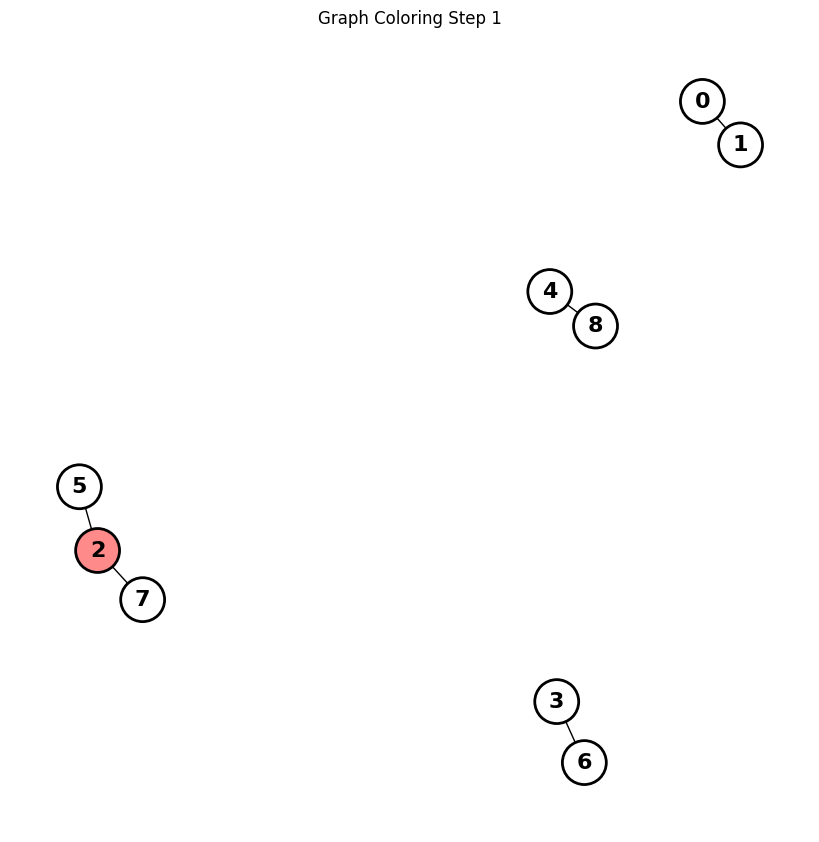

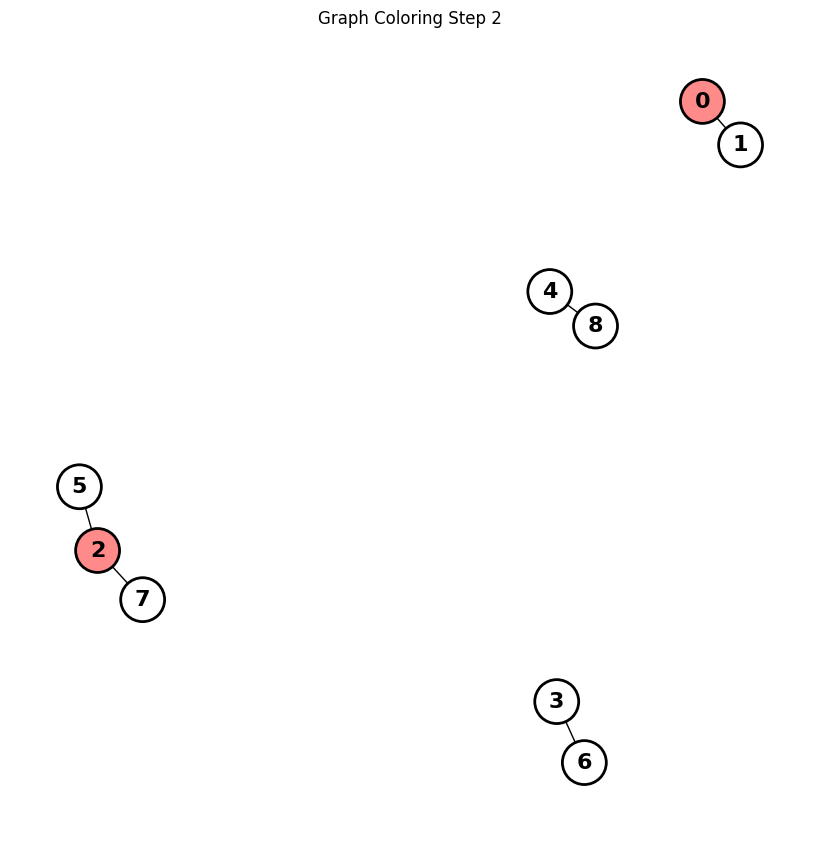

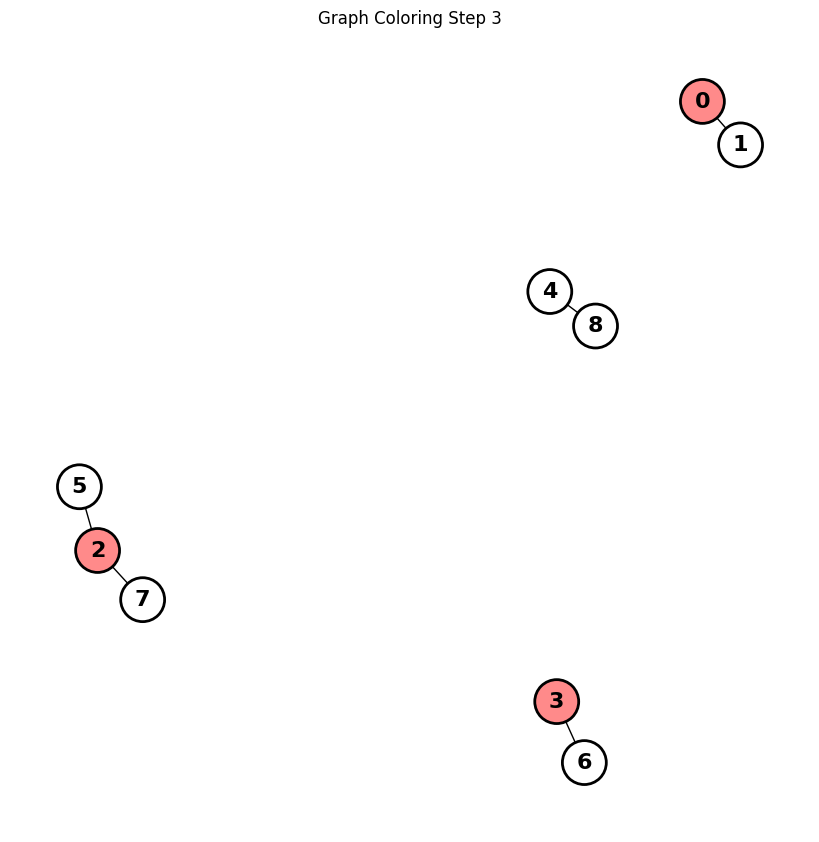

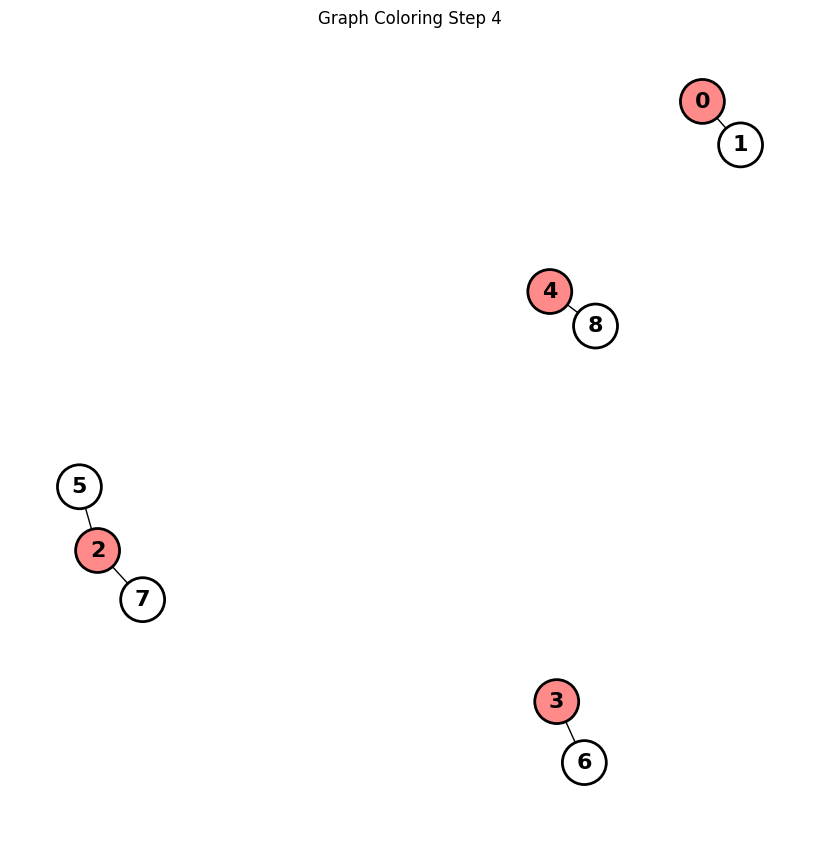

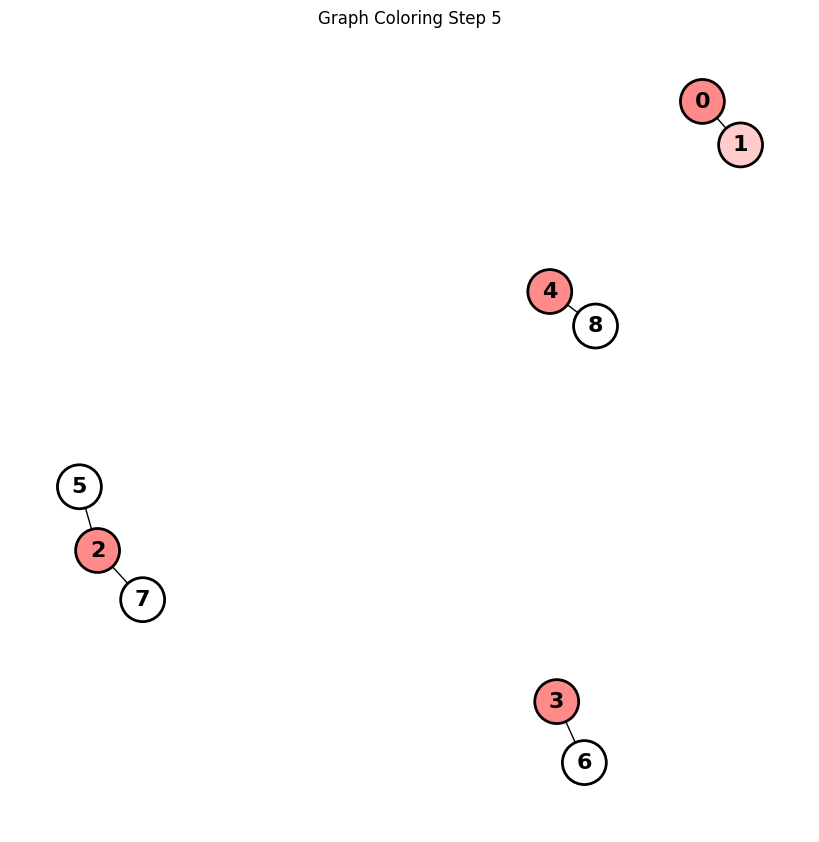

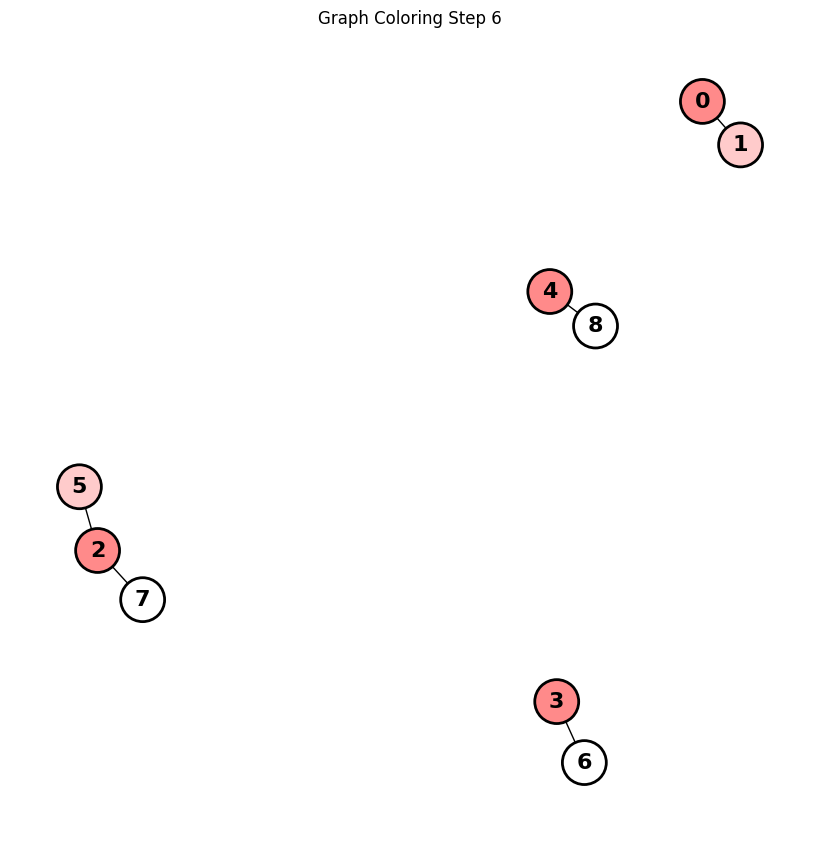

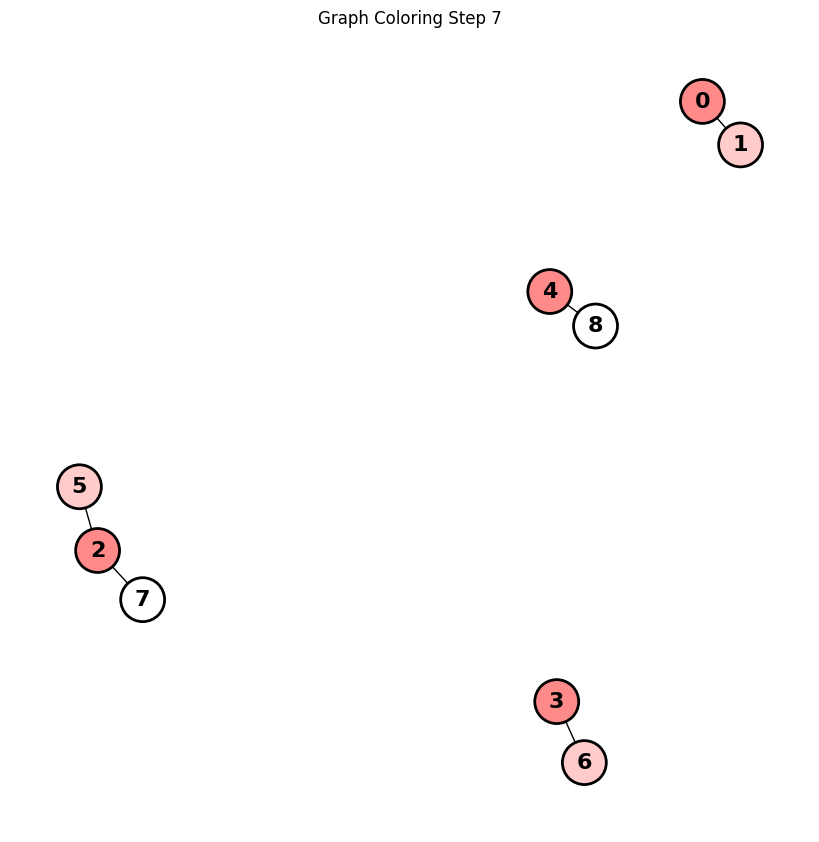

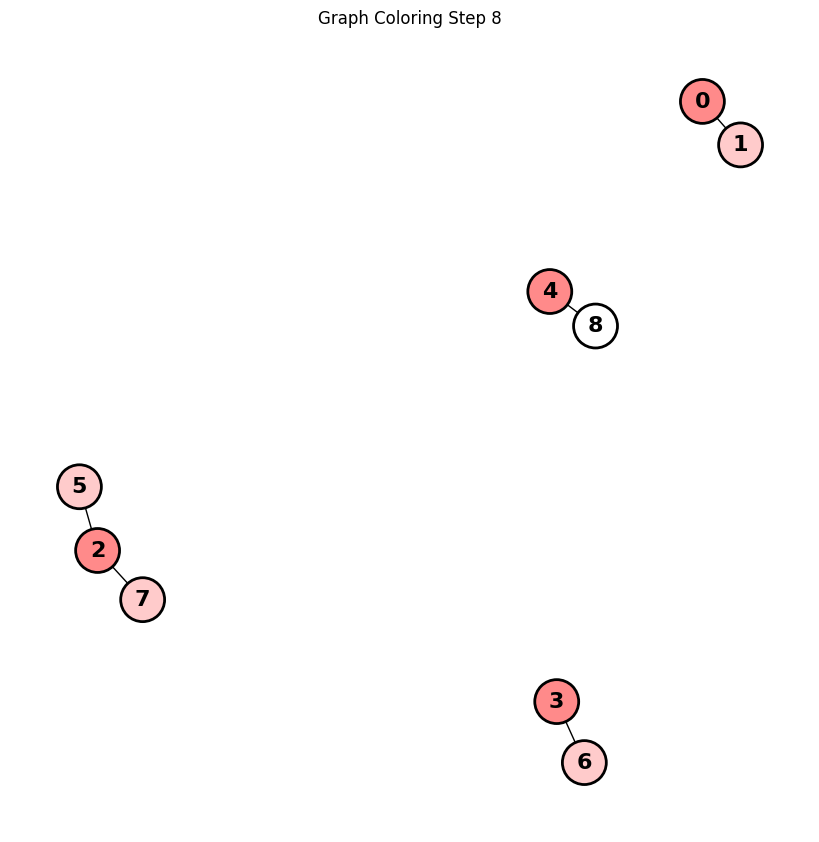

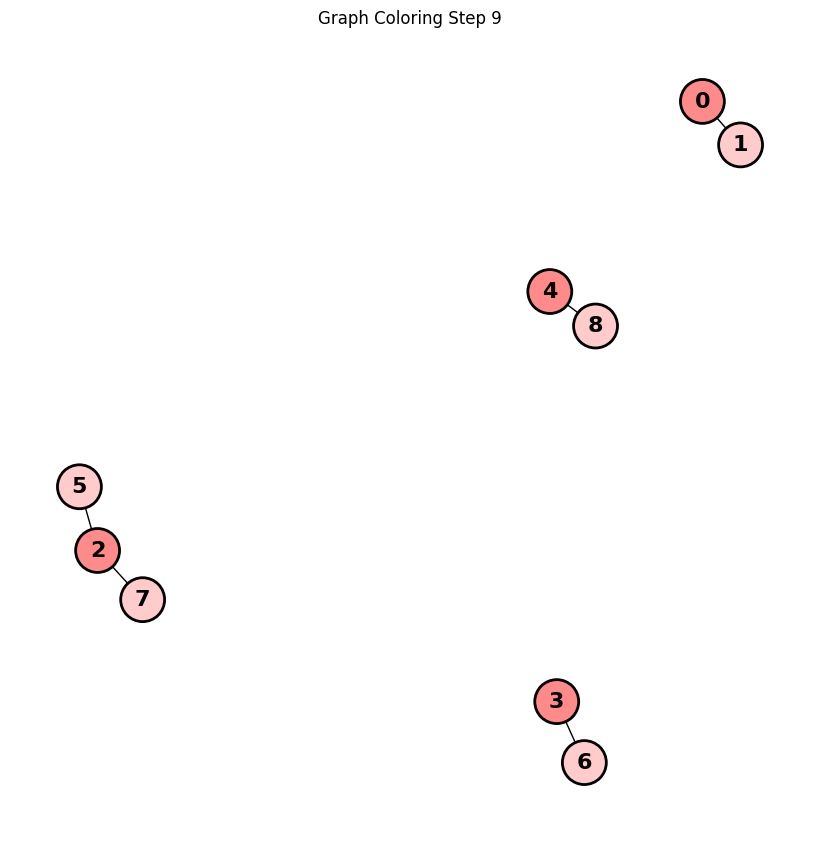

Final Assignment: {2: '#FF8A8A', 0: '#FF8A8A', 3: '#FF8A8A', 4: '#FF8A8A', 1: '#FFCBCB', 5: '#FFCBCB', 6: '#FFCBCB', 7: '#FFCBCB', 8: '#FFCBCB'}


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Automatically generate a set of colors based on the number of nodes
def generate_colors(num_nodes):
    base_colors = ['#FF8A8A', '#FFCBCB', '#A8D1D1', '#DFEBEB', '#9EAD41', '#00FFFF', '#800080', '#FFA500', '#00FF7F']

    # Generate more colors if num_nodes > len(base_colors)
    if num_nodes > len(base_colors):
        random_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(num_nodes - len(base_colors))]
        color_list = base_colors + random_colors
    else:
        color_list = base_colors[:num_nodes]

    return color_list

# Step 2: Create a random graph with subject constraints
def create_random_graph(num_nodes, constraints):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))  # Add subjects as nodes

    # Add edges based on constraints: subjects that cannot share the same day
    for (s1, s2) in constraints:
        G.add_edge(s1, s2)

    return G

# Step 3: Visualize the graph coloring step by step
def visualize_graph(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))
    node_colors = ['#ffffff'] * len(G.nodes)
    for node, color in assignment.items():
        node_colors[node] = color

    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 4: Check if a color assignment is valid considering the constraints
def is_valid_color(G, node, color, assignment):
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(G, assignment, colors):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(G, node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with Heuristics
def backtracking_with_heuristics(G, assignment, heuristic, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment

    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(G, assignment, colors)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(G, assignment)
    else:
        node = list(G.nodes)[len(assignment)]

    for color in colors:
        if is_valid_color(G, node, color, assignment):
            assignment[node] = color
            visualize_graph(G, assignment, step, pos)
            result = backtracking_with_heuristics(G, assignment, heuristic, step+1, colors, pos)
            if result:
                return result
            del assignment[node]

    return None

# Step 8: Let user choose number of nodes, constraints, and backtracking heuristic
def color_graph_with_user_input():
    num_nodes = int(input("Enter the number of SUBJECTS: "))

    # Define constraints (subjects that CANNOT share the same day)
    constraints = []
    print("Enter pairs of subjects that CANNOT share the same day (format: 'subject1 subject2'). Type 'done' when finished.")
    while True:
        inp = input("Pair: ")
        if inp.lower() == 'done':
            break
        s1, s2 = map(int, inp.split())
        constraints.append((s1, s2))

    colors = generate_colors(num_nodes)
    G = create_random_graph(num_nodes, constraints)

    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    heuristic = 'MRV' if choice == '1' else 'Degree' if choice == '2' else None

    pos = nx.spring_layout(G, seed=42)
    final_assignment = backtracking_with_heuristics(G, {}, heuristic, 1, colors, pos)

    if final_assignment:
        print("Final Assignment:", final_assignment)
    else:
        print("No valid coloring found. Try different constraints or more colors.")

# Step 9: Run the graph coloring with user input
color_graph_with_user_input()

def color_graph_with_user_input():
    num_nodes = int(input("Enter the number of SUBJECTS: "))

    # Define constraints (subjects that CANNOT share the same day)
    constraints = []
    print("Enter pairs of subjects that CANNOT share the same day (format: 'subject1 subject2'). Type 'done' when finished.")
    while True:
        inp = input("Pair: ")
        if inp.lower() == 'done':
            break

        # Ensure the input contains exactly two values
        try:
            s1, s2 = map(int, inp.split())
            if s1 < num_nodes and s2 < num_nodes:
                constraints.append((s1, s2))
            else:
                print(f"Invalid input: {s1}, {s2}. Make sure subject indices are within the range of 0 to {num_nodes - 1}.")
        except ValueError:
            print("Invalid input. Please enter two integers separated by a space.")

    colors = generate_colors(num_nodes)
    G = create_random_graph(num_nodes, constraints)

    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    heuristic = 'MRV' if choice == '1' else 'Degree' if choice == '2' else None

    pos = nx.spring_layout(G, seed=42)
    final_assignment = backtracking_with_heuristics(G, {}, heuristic, 1, colors, pos)

    if final_assignment:
        print("Final Assignment:", final_assignment)
    else:
        print("No valid coloring found. Try different constraints or more colors.")

